# Sales Performance Business Analysis

## Overview
This project analyzes company sales data to uncover performance trends, identify profit drivers, and highlight areas of improvement to support data-driven business decisions.

## Business Questions
- What are the overall sales and profit trends over time?
- Which products and regions generate the highest profit?
- Which segments or categories are underperforming?

## Dataset
Sample Superstore sales dataset containing order-level data such as sales, profit, product category, region, and customer segment.

## Tools Used
- Python (Pandas, Matplotlib, Seaborn)
- Jupyter Notebook

## Key Insights
- Sales show consistent growth, but profit varies significantly across regions.
- Certain product categories generate high revenue but low or negative profit.
- Specific regions consistently underperform and require strategic review.

## Business Recommendations
- Focus marketing efforts on high-profit product categories.
- Re-evaluate pricing or shipping costs in loss-making regions.
- Discontinue or optimize low-margin products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unicodedata import category

df = pd.read_csv('../Data/Amazon.csv', low_memory=False)

df.head()

,,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,1/31/2023,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,12/30/2023,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,5/10/2022,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,7/18/2023,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2/4/2023,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


#### Clean Column Names

In [3]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
)
df.columns

Index(['', 'orderdate', 'customerid', 'customername', 'productid',
       'productname', 'category', 'brand', 'quantity', 'unitprice', 'discount',
       'tax', 'shippingcost', 'totalamount', 'paymentmethod', 'orderstatus',
       'city', 'state', 'country', 'sellerid'],
      dtype='object')

#### The First column dose not giving a name so we have to fix that

In [5]:
df.columns.values[0] = "orderid"
df.columns

Index(['orderid', 'orderdate', 'customerid', 'customername', 'productid',
       'productname', 'category', 'brand', 'quantity', 'unitprice', 'discount',
       'tax', 'shippingcost', 'totalamount', 'paymentmethod', 'orderstatus',
       'city', 'state', 'country', 'sellerid'],
      dtype='object')

#### Prepare Time Data (MOST IMPORTANT)

In [7]:
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')

### Aggregation = summarizing data

In [8]:
df['totalamount'].sum()

'319.86259.64108.06159.66821.362017.53394.81   638.14565.75150.771791.231986.51766.231103.141681.911636.882747.962968.03987.62247.122084.372383.25299.7617.71286.861449.89468.161359.321185.13638.22485.18306.64241.91489.87275.082427.311348.422030.8159.11733.872715.7481.02268.91627.59858.99489.55289.59650.851300.27558.941417.95716.85500.852199.611236.261206.42970.47442.39931.132668.29472.26226.77547.131871.761068.18784.19561.98565.3898.171662.11457.083160.431129.16756.182073.68403.67598.25166.55553.06816.6981.39875.78553.132110.1973.28147.962103.18845.241485.85878.392367.55589.661948.45165.79160.71564.911129.991777.75231.781312.4836.29321.392315.5316.88113.21954.09526.8343.052743.6365.371860.74610.76165.81548.631490.6365.311263.06932.17851.391110.21117.2824.6278.741066.61680.111473.11687.2627.441944.011025.251568.691679.991737.06653.482559.721039.49644.981086.33289.34126.512289.77433.24929.77114.512542.08209.2195.94795.51148.14908.911028.21371.381041.851049.12571.78477.5789.621218.27265.4

#### As you can see this totalamount column is NOT numeric, so we've to fix that
It is stored as text (string / object).

In [9]:
df['totalamount'].dtype

dtype('O')

#### so let fix it and covert it to number

In [11]:
## convert to number
df['totalamount'] = pd.to_numeric(df['totalamount'], errors='coerce')
## and check the data type
df['totalamount'].dtype

dtype('float64')

#### Aggregation = summarizing data using
- sum
- mean (avg)
- count
- max
- min
 and more.

In [20]:
print('total sum', df['totalamount'].sum())
print('average', df['totalamount'].mean())
print('count', df['totalamount'].count())
print('max', df['totalamount'].max())
print('min', df['totalamount'].min())

total sum 91825030.19
average 918.259484494845
count 99999
max 3534.98
min 4.27


### GroupBy in Python (using pandas) is used to split data into groups, apply calculations, and combine the results.

In [38]:
df.groupby('category')['totalamount'].sum()

category
Books                15261837.01
Clothing             15253397.50
Electronics          15584217.18
Home & Kitchen       15163939.36
Sports & Outdoors    15345571.88
Toys & Games         15216067.26
Name: totalamount, dtype: float64

In [40]:
## Revenue by customer
df.groupby('customerid')['totalamount'].sum()

customerid
CUST000001     446.48
CUST000002    1389.93
CUST000003    1116.91
CUST000004    2660.06
CUST000005    1089.56
               ...   
CUST049995    5573.32
CUST049996     610.28
CUST049997     508.19
CUST049998     672.19
CUST049999    1570.37
Name: totalamount, Length: 43233, dtype: float64

### Date and time

In [45]:
df['year'] = df['orderdate'].dt.year
df['month'] = df['orderdate'].dt.month
df['day'] = df['orderdate'].dt.day

### Monthly Aggregation

In [ ]:
monthly_revenue = (
    df.groupby(df['orderdate'].dt.to_period('M'))['totalamount']
    .sum()
    .reset_index()
)

monthly_revenue['orderdate'] = monthly_revenue['orderdate'].astype(str)


#### Revenue Trend Over Time

In [23]:
monthly_revenue = (
    df.groupby(df['orderdate'].dt.to_period('M'))
    .agg(total_revenue=('totalamount', 'sum'),
    total_order=('orderdate', 'count'))
    .reset_index()
)
monthly_revenue['orderdate'] = monthly_revenue['orderdate'].astype(str)
monthly_revenue

,orderdate,total_revenue,total_order
0,2020-01,1637069.40,1730
1,2020-02,1339388.21,1490
2,2020-03,1587125.66,1685
3,2020-04,1588347.29,1692
4,2020-05,1533834.17,1672
5,2020-06,1500269.29,1633
6,2020-07,1552981.94,1687
7,2020-08,1640874.93,1783
8,2020-09,1554682.21,1679
9,2020-10,1515403.62,1647


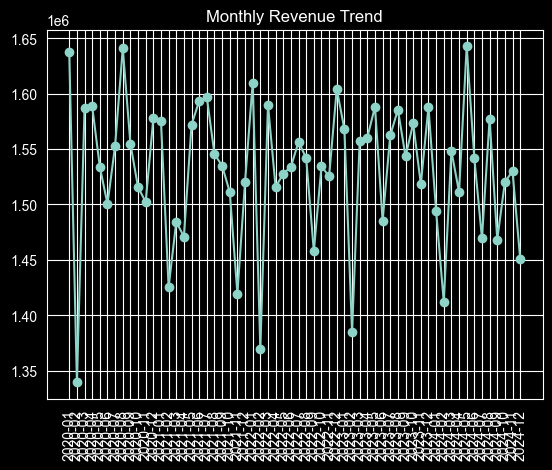

In [25]:
plt.figure()
plt.plot(monthly_revenue['orderdate'], monthly_revenue['total_revenue'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend')
plt.show()

### Insight
Revenue shows clear seasonal patterns, indicating periods of peak customer demand.


#### Top Categories by Revenue


In [36]:
category_revenue = (
    df.groupby('category')['totalamount'].sum()
    .sort_values(ascending=False)
    .reset_index()
)
category_revenue

,category,totalamount
0,Electronics,15584217.18
1,Sports & Outdoors,15345571.88
2,Books,15261837.01
3,Clothing,15253397.50
4,Toys & Games,15216067.26
5,Home & Kitchen,15163939.36


<Figure size 640x480 with 0 Axes>

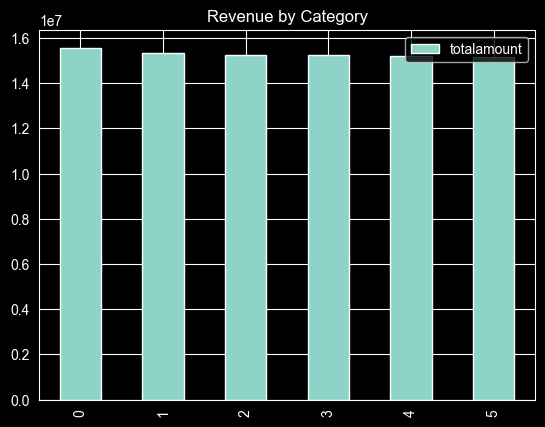

In [37]:
plt.figure()
category_revenue.plot(kind='bar')
plt.title('Revenue by Category')
plt.show()

#### Filtering in Pandas (LIKE SQL WHERE)

In pandas, filtering is done using boolean conditions.

In [52]:
df[df['category'] == 'Electronics']

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day
18,ORD0000019,2024-08-14,CUST040211,Aditya Mehta,P00033,Puzzle 1000pc,Electronics,ReadMore,5,529.19,...,2968.03,Amazon Pay,Returned,Phoenix,AZ,United States,SELL01907,2024,8,14
23,ORD0000024,2020-12-09,CUST033080,Vihaan Mehta,P00021,Backpack,Electronics,ReadMore,3,107.95,...,299.76,Net Banking,Delivered,Dallas,TX,United States,SELL01507,2020,12,9
28,ORD0000029,2023-04-30,CUST000721,Vivaan Kumar,P00036,Smart Light Bulb,Electronics,Zenith,3,381.45,...,1359.32,Credit Card,Delivered,Denver,CO,United States,SELL01715,2023,4,30
32,ORD0000033,2021-04-04,CUST011946,Simran Patel,P00047,Memory Card 128GB,Electronics,CoreTech,2,151.95,...,306.64,Credit Card,Delivered,Washington,DC,United States,SELL01798,2021,4,4
36,ORD0000037,2022-01-17,CUST043577,Kabir Singh,P00032,Board Game,Electronics,CoreTech,5,448.89,...,2427.31,Credit Card,Delivered,Phoenix,AZ,United States,SELL00755,2022,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99961,ORD0099962,2022-02-22,CUST030740,Ritika Mehta,P00030,Dress Shirt,Electronics,HomeEase,2,354.58,...,750.30,Debit Card,Delivered,Jacksonville,FL,United States,SELL00451,2022,2,22
99963,ORD0099964,2020-08-21,CUST044606,Pooja Reddy,P00019,LED Desk Lamp,Electronics,NexPro,5,204.73,...,888.37,Amazon Pay,Delivered,Phoenix,AZ,United States,SELL00462,2020,8,21
99983,ORD0099984,2024-02-14,CUST033303,Arjun Mehta,P00027,Winter Jacket,Electronics,NexPro,4,480.40,...,2081.54,Amazon Pay,Delivered,San Diego,CA,United States,SELL00571,2024,2,14
99990,ORD0099991,2024-05-29,CUST019886,Sneha Kapoor,P00001,Wireless Earbuds,Electronics,KiddoFun,1,150.64,...,166.55,Credit Card,Returned,Columbus,OH,United States,SELL01066,2024,5,29


### ==

In [53]:
df[
    (df['category'] == 'Electronics') &
    (df['totalamount'] > 500)
]

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day
18,ORD0000019,2024-08-14,CUST040211,Aditya Mehta,P00033,Puzzle 1000pc,Electronics,ReadMore,5,529.19,...,2968.03,Amazon Pay,Returned,Phoenix,AZ,United States,SELL01907,2024,8,14
28,ORD0000029,2023-04-30,CUST000721,Vivaan Kumar,P00036,Smart Light Bulb,Electronics,Zenith,3,381.45,...,1359.32,Credit Card,Delivered,Denver,CO,United States,SELL01715,2023,4,30
36,ORD0000037,2022-01-17,CUST043577,Kabir Singh,P00032,Board Game,Electronics,CoreTech,5,448.89,...,2427.31,Credit Card,Delivered,Phoenix,AZ,United States,SELL00755,2022,1,17
37,ORD0000038,2022-05-06,CUST029566,Sahil Kumar,P00015,Instant Pot,Electronics,ReadMore,4,300.89,...,1348.42,Credit Card,Delivered,Fort Worth,TX,United States,SELL01262,2022,5,6
44,ORD0000045,2021-11-30,CUST017434,Pooja Verma,P00035,Desk Plant,Electronics,Apex,4,395.64,...,1627.59,Debit Card,Delivered,Houston,TX,United States,SELL00898,2021,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,ORD0099952,2022-02-19,CUST025159,Karan Joshi,P00009,Portable SSD 1TB,Electronics,FitLife,5,131.90,...,784.04,Debit Card,Shipped,Philadelphia,PA,United States,SELL00498,2022,2,19
99961,ORD0099962,2022-02-22,CUST030740,Ritika Mehta,P00030,Dress Shirt,Electronics,HomeEase,2,354.58,...,750.30,Debit Card,Delivered,Jacksonville,FL,United States,SELL00451,2022,2,22
99963,ORD0099964,2020-08-21,CUST044606,Pooja Reddy,P00019,LED Desk Lamp,Electronics,NexPro,5,204.73,...,888.37,Amazon Pay,Delivered,Phoenix,AZ,United States,SELL00462,2020,8,21
99983,ORD0099984,2024-02-14,CUST033303,Arjun Mehta,P00027,Winter Jacket,Electronics,NexPro,4,480.40,...,2081.54,Amazon Pay,Delivered,San Diego,CA,United States,SELL00571,2024,2,14


#### ISNOT

In [54]:
df[df['category'].isin(['Electronics', 'Clothing'])]

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,2022,5,10
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,...,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411,2023,2,4
6,ORD0000007,2024-09-20,CUST037667,Aarav Verma,P00030,Dress Shirt,Clothing,UrbanStyle,2,219.81,...,394.81,UPI,Delivered,Chicago,IL,Australia,SELL01676,2024,9,20
9,ORD0000010,2020-05-01,CUST029472,Aarav Reddy,P00001,Wireless Earbuds,Clothing,Apex,2,278.21,...,565.75,Credit Card,Delivered,Houston,TX,United States,SELL01584,2020,5,1
18,ORD0000019,2024-08-14,CUST040211,Aditya Mehta,P00033,Puzzle 1000pc,Electronics,ReadMore,5,529.19,...,2968.03,Amazon Pay,Returned,Phoenix,AZ,United States,SELL01907,2024,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,ORD0099985,2021-01-13,CUST044331,Sahil Gupta,P00043,HDMI Cable 2m,Clothing,ReadMore,2,442.64,...,868.29,Net Banking,Delivered,Columbus,OH,United States,SELL00549,2021,1,13
99986,ORD0099987,2021-07-21,CUST033288,Aarav Patel,P00007,Mechanical Keyboard,Clothing,ReadMore,4,528.88,...,2114.00,Credit Card,Returned,Seattle,WA,United States,SELL00691,2021,7,21
99987,ORD0099988,2020-01-30,CUST011195,Aditya Kumar,P00022,Water Bottle,Clothing,UrbanStyle,1,240.63,...,253.33,Net Banking,Delivered,Denver,CO,United States,SELL00030,2020,1,30
99990,ORD0099991,2024-05-29,CUST019886,Sneha Kapoor,P00001,Wireless Earbuds,Electronics,KiddoFun,1,150.64,...,166.55,Credit Card,Returned,Columbus,OH,United States,SELL01066,2024,5,29


In [66]:
delivered_summary = (
    df[df["orderstatus"] == "Delivered"]
    .groupby("paymentmethod")
    .agg(
        total_orders=("customerid", "count"),
        total_amount=("totalamount", "sum")
    )
    .reset_index()
)
delivered_summary

,paymentmethod,total_orders,total_amount
0,Amazon Pay,11251,10272833.59
1,Cash on Delivery,3633,3305179.75
2,Credit Card,26073,23933235.36
3,Debit Card,14917,13766755.60
4,Net Banking,7406,6702679.86
5,UPI,11348,10391992.94


### IN
- AND
- IN AND OR
- BETWEEEN
- ISNOT NULL

In [76]:
# IS NOT
df[
    df["orderstatus"] != "Cancelled" ]

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,2023,1,31
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,2023,12,30
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,...,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908,2022,5,10
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,...,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164,2023,7,18
5,ORD0000006,2022-12-31,CUST042705,Karan Sharma,P00023,Cookware Set,Books,ReadMore,4,449.73,...,2017.53,UPI,Delivered,Los Angeles,CA,United States,SELL01494,2022,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD0099996,2023-03-07,CUST001356,Karan Joshi,P00047,Memory Card 128GB,Electronics,Apex,2,492.34,...,1066.20,UPI,Delivered,Jacksonville,FL,India,SELL00041,2023,3,7
99996,ORD0099997,2021-11-24,CUST031254,Sunita Kapoor,P00046,Car Charger,Sports & Outdoors,Apex,5,449.30,...,2432.29,Credit Card,Delivered,San Jose,CA,United States,SELL01449,2021,11,24
99997,ORD0099998,2023-04-29,CUST012579,Aman Gupta,P00030,Dress Shirt,Sports & Outdoors,BrightLux,4,232.40,...,1016.40,Cash on Delivery,Delivered,Indianapolis,IN,United States,SELL00028,2023,4,29
99998,ORD0099999,2021-11-01,CUST026243,Simran Gupta,P00046,Car Charger,Sports & Outdoors,HomeEase,1,294.05,...,330.66,Debit Card,Delivered,Charlotte,NC,United States,SELL00324,2021,11,1


### Between

In [79]:
between_amount = df[
    df["totalamount"].between(200, 600)
]
between_amount

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,...,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967,2023,1,31
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,2023,12,30
6,ORD0000007,2024-09-20,CUST037667,Aarav Verma,P00030,Dress Shirt,Clothing,UrbanStyle,2,219.81,...,394.81,UPI,Delivered,Chicago,IL,Australia,SELL01676,2024,9,20
9,ORD0000010,2020-05-01,CUST029472,Aarav Reddy,P00001,Wireless Earbuds,Clothing,Apex,2,278.21,...,565.75,Credit Card,Delivered,Houston,TX,United States,SELL01584,2020,5,1
20,ORD0000021,2024-08-12,CUST041508,Vikas Kapoor,P00028,Jeans,Toys & Games,Apex,1,226.26,...,247.12,Credit Card,Delivered,Fort Worth,TX,United States,SELL01947,2024,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99972,ORD0099973,2024-06-05,CUST025991,Sneha Verma,P00004,USB-C Charger,Home & Kitchen,Zenith,2,197.45,...,387.74,Credit Card,Delivered,Los Angeles,CA,United States,SELL00392,2024,6,5
99977,ORD0099978,2022-03-09,CUST048839,Simran Kapoor,P00010,Smartwatch,Toys & Games,ReadMore,4,120.49,...,483.16,Debit Card,Delivered,Philadelphia,PA,United States,SELL01635,2022,3,9
99981,ORD0099982,2020-11-27,CUST000934,Sneha Kapoor,P00021,Backpack,Toys & Games,NexPro,1,391.48,...,444.94,Cash on Delivery,Delivered,Chicago,IL,United States,SELL00726,2020,11,27
99987,ORD0099988,2020-01-30,CUST011195,Aditya Kumar,P00022,Water Bottle,Clothing,UrbanStyle,1,240.63,...,253.33,Net Banking,Delivered,Denver,CO,United States,SELL00030,2020,1,30


### Filter 'Like'

In [88]:
df[df['customername'].str.contains('pooja', case=False, na=False)]

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,...,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298,2023,12,30
13,ORD0000014,2024-01-22,CUST006051,Pooja Sharma,P00040,Microphone,Home & Kitchen,Apex,3,523.27,...,1766.23,Debit Card,Shipped,Seattle,WA,United States,SELL00672,2024,1,22
21,ORD0000022,2023-08-25,CUST048817,Pooja Sharma,P00010,Smartwatch,Books,ReadMore,4,493.47,...,2084.37,Credit Card,Delivered,Chicago,IL,Australia,SELL01672,2023,8,25
35,ORD0000036,2020-09-09,CUST047957,Pooja Verma,P00033,Puzzle 1000pc,Books,BrightLux,1,357.76,...,275.08,Amazon Pay,Delivered,Columbus,OH,United Kingdom,SELL01592,2020,9,9
44,ORD0000045,2021-11-30,CUST017434,Pooja Verma,P00035,Desk Plant,Electronics,Apex,4,395.64,...,1627.59,Debit Card,Delivered,Houston,TX,United States,SELL00898,2021,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99878,ORD0099879,2021-05-11,CUST047402,Pooja Sharma,P00007,Mechanical Keyboard,Clothing,Zenith,1,277.26,...,305.96,Net Banking,Delivered,Columbus,OH,India,SELL01561,2021,5,11
99890,ORD0099891,2021-02-06,CUST033884,Pooja Patel,P00005,Laptop Sleeve,Home & Kitchen,Zenith,1,350.86,...,378.96,Credit Card,Delivered,San Antonio,TX,United States,SELL00883,2021,2,6
99950,ORD0099951,2024-07-18,CUST030388,Pooja Patel,P00009,Portable SSD 1TB,Home & Kitchen,Zenith,2,385.82,...,746.44,Debit Card,Delivered,Austin,TX,United States,SELL00811,2024,7,18
99956,ORD0099957,2022-07-08,CUST003211,Pooja Verma,P00007,Mechanical Keyboard,Books,HomeEase,1,350.68,...,392.97,Credit Card,Delivered,Seattle,WA,United States,SELL00705,2022,7,8


### Date Filtering

In [89]:
df[
    df['orderdate'].dt.year == 2024
]

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day
6,ORD0000007,2024-09-20,CUST037667,Aarav Verma,P00030,Dress Shirt,Clothing,UrbanStyle,2,219.81,...,394.81,UPI,Delivered,Chicago,IL,Australia,SELL01676,2024,9,20
8,ORD0000009,2024-06-26,CUST026965,Aman Kapoor,P00031,Kids Toy Car,Sports & Outdoors,Apex,4,146.09,...,638.14,Debit Card,Delivered,Washington,DC,United States,SELL01895,2024,6,26
13,ORD0000014,2024-01-22,CUST006051,Pooja Sharma,P00040,Microphone,Home & Kitchen,Apex,3,523.27,...,1766.23,Debit Card,Shipped,Seattle,WA,United States,SELL00672,2024,1,22
18,ORD0000019,2024-08-14,CUST040211,Aditya Mehta,P00033,Puzzle 1000pc,Electronics,ReadMore,5,529.19,...,2968.03,Amazon Pay,Returned,Phoenix,AZ,United States,SELL01907,2024,8,14
20,ORD0000021,2024-08-12,CUST041508,Vikas Kapoor,P00028,Jeans,Toys & Games,Apex,1,226.26,...,247.12,Credit Card,Delivered,Fort Worth,TX,United States,SELL01947,2024,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,ORD0099971,2024-01-11,CUST034218,Kabir Sharma,P00014,Drone Mini,Toys & Games,BrightLux,5,581.21,...,2748.94,Credit Card,Delivered,Houston,TX,United States,SELL00764,2024,1,11
99972,ORD0099973,2024-06-05,CUST025991,Sneha Verma,P00004,USB-C Charger,Home & Kitchen,Zenith,2,197.45,...,387.74,Credit Card,Delivered,Los Angeles,CA,United States,SELL00392,2024,6,5
99974,ORD0099975,2024-04-25,CUST040916,Sahil Kapoor,P00023,Cookware Set,Toys & Games,Zenith,5,473.91,...,2488.17,Debit Card,Shipped,San Diego,CA,United States,SELL01492,2024,4,25
99983,ORD0099984,2024-02-14,CUST033303,Arjun Mehta,P00027,Winter Jacket,Electronics,NexPro,4,480.40,...,2081.54,Amazon Pay,Delivered,San Diego,CA,United States,SELL00571,2024,2,14


### NOT NULL

In [82]:
df[df["paymentmethod"].isna()]

,orderid,orderdate,customerid,customername,productid,productname,category,brand,quantity,unitprice,...,totalamount,paymentmethod,orderstatus,city,state,country,sellerid,year,month,day


###  Combining FILTER + GROUPBY
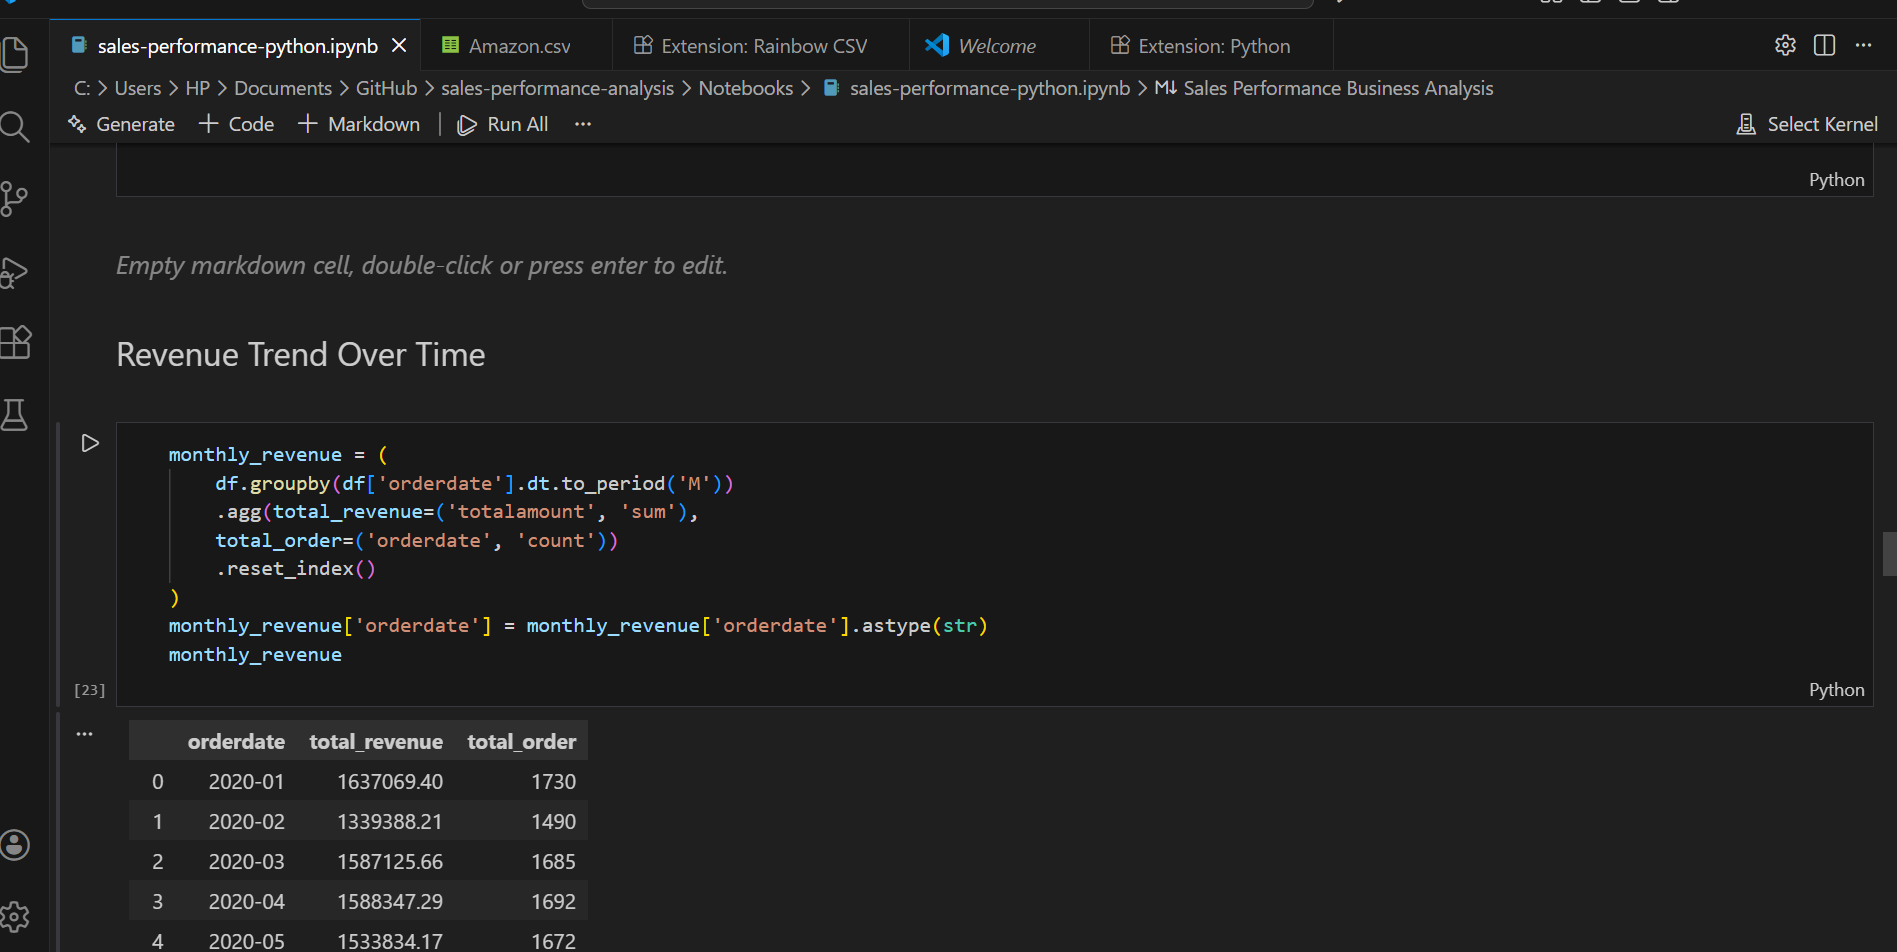

In [84]:
delivered_summary = (
    df[df["orderstatus"] == "Delivered"]
    .groupby("paymentmethod")
    .agg(
        total_orders=("orderid", "count"),
        total_amount=("totalamount", "sum")
    )
    .reset_index()
)
delivered_summary

,paymentmethod,total_orders,total_amount
0,Amazon Pay,11251,10272833.59
1,Cash on Delivery,3633,3305179.75
2,Credit Card,26073,23933235.36
3,Debit Card,14917,13766755.60
4,Net Banking,7406,6702679.86
5,UPI,11348,10391992.94
